In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Predata/GUILLE/Spain_CURADO.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281559 entries, 0 to 281558
Columns: 201 entries, ANS_Party to Partido_Preferido
dtypes: float64(112), int64(76), object(13)
memory usage: 431.8+ MB


In [5]:
df.head(2)

,ANS_Party,Record.ID,Attempt,IP.Address,Browser,Version,Platform,Mobile,Timestamp,X.Placement,...,Petition,Boycot,MaxParty,MaxParty_NA,MaxParty_Rep,Preferido_Partido_Pref.F,Partido_Pref.Comparado.F,english,Partido_Maximo,Partido_Preferido
0,19.0,203846,1,30c55d031f11e6bdd84db7abb2e1241c,iPhone,7,iPhone,1,5/20/2014 6:31,NaN,...,NaN,NaN,NaN,172334,NaN,NaN,NaN,PP,NaN,PP
1,19.0,100086,1,68fe4acce80979ac9e4229ffa206a2cd,Internet Explorer,9,Windows,0,5/9/2014 3:12,5.0,...,NaN,NaN,10.0,172334,1.0,DD_PP,PP,PP,PP,PP


In [6]:
df.columns

Index([u'ANS_Party', u'Record.ID', u'Attempt', u'IP.Address', u'Browser',
       u'Version', u'Platform', u'Mobile', u'Timestamp', u'X.Placement',
       ...
       u'Petition', u'Boycot', u'MaxParty', u'MaxParty_NA', u'MaxParty_Rep',
       u'Preferido_Partido_Pref.F', u'Partido_Pref.Comparado.F', u'english',
       u'Partido_Maximo', u'Partido_Preferido'],
      dtype='object', length=201)

In [10]:
for el in df.columns:
    print(el): 

ANS_Party
Record.ID
Attempt
IP.Address
Browser
Version
Platform
Mobile
Timestamp
X.Placement
Y.Placement
Z.Placement
language
http_referer
sq1t
sq2t
sl2at
sl2bt
sl2ct
dd1t
optint
SupQ_1
SupQ_2
SupQ_3
SupQ_4
SupQ_5
SupQ_6
SupQ_7
SupQ_8
SupQ_9
SupQ_10
SupQ_11
SupQ_12
SupQ_13
SupQ_14
SupQ_15
SupQ_16
SupQ_17
SupQ_18
SupQ_19
SupQ_20
SL1_PP
SL1_PSOE
SL1_IU
SL1_UpyD
SL1_PNV_CiU
SL1_ERC
SL1_BNG_Bildu
SL1_Podemos
SL2_PP
SL2_PSOE
SL2_IU
SL2_UpyD
SL2_PNV_CiU
SL2_ERC
SL2_BNG_Bildu
SL2_Podemos
SL3_PP
SL3_PSOE
SL3_IU
SL3_UpyD
SL3_PNV_CiU
SL3_ERC
SL3_BNG_Bildu
SL3_Podemos
DD_PP
DD_PSOE
DD_IU
DD_UpyD
DD_PNV_CiU
DD_ERC
DD_BNG_Bildu
DD_Podemos
DD_Equo
DD_VOX
Ans_1
RTime_1
Ans_2
RTime_2
Ans_3
RTime_3
Ans_4
RTime_4
Ans_5
RTime_5
Ans_6
RTime_6
Ans_7
RTime_7
Ans_8
RTime_8
Ans_9
RTime_9
Ans_10
RTime_10
Ans_11
RTime_11
Ans_12
RTime_12
Ans_13
RTime_13
Ans_14
RTime_14
Ans_15
RTime_15
Ans_16
RTime_16
Ans_17
RTime_17
Ans_18
RTime_18
Ans_19
RTime_19
Ans_20
RTime_20
Ans_21
RTime_21
Ans_22
RTime_22
Ans_23
RTime_23
A

In [162]:
def areCatVal(df):
    return (df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)
def areCat(df):
    return (df['SupQ_7'] == 119)
def areVal(df):
    return (df['SupQ_7'] == 120)
def areAll(df):
    return (df['SupQ_7'] != 999)
def areGal(df):
    return (df['SupQ_7'] == 122)
def areVasc(df):
    return (df['SupQ_7'] == 126)

In [61]:
def castellanoVsCatala(ax_party, pop_segment):
    fig, ax = plt.subplots(1,2, figsize=(20,5))
    df.loc[(df['language']=='castellano') & pop_segment(df), ax_party].hist(bins=21, ax=ax[0])
    ax[0].set(title='Castellanoparlantes')
    df.loc[(df['language']=='catalan') & pop_segment(df), ax_party].hist(bins=21, ax=ax[1])
    ax[1].set(title='Cataloparlantes')

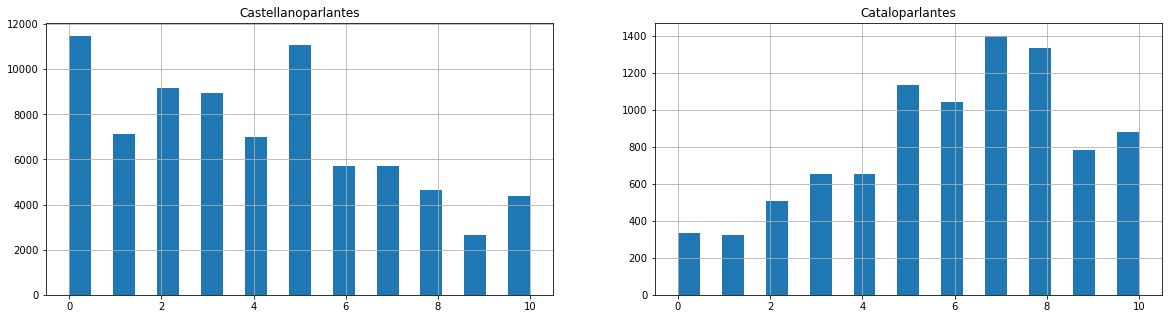

In [69]:
castellanoVsCatala('SL3_ERC', areAll)

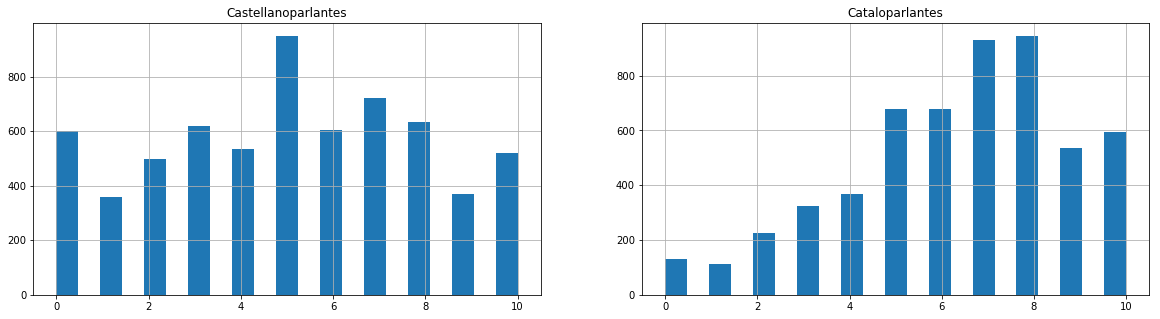

In [65]:
castellanoVsCatala('SL3_ERC', areCat)

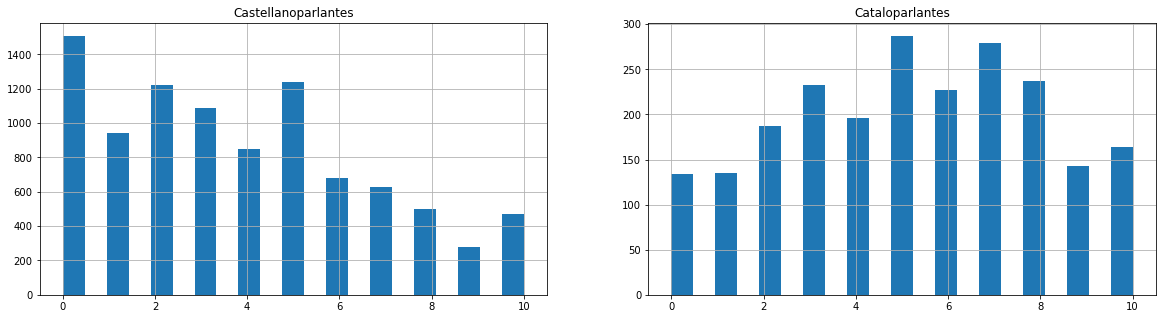

In [66]:
castellanoVsCatala('SL3_ERC', areVal)

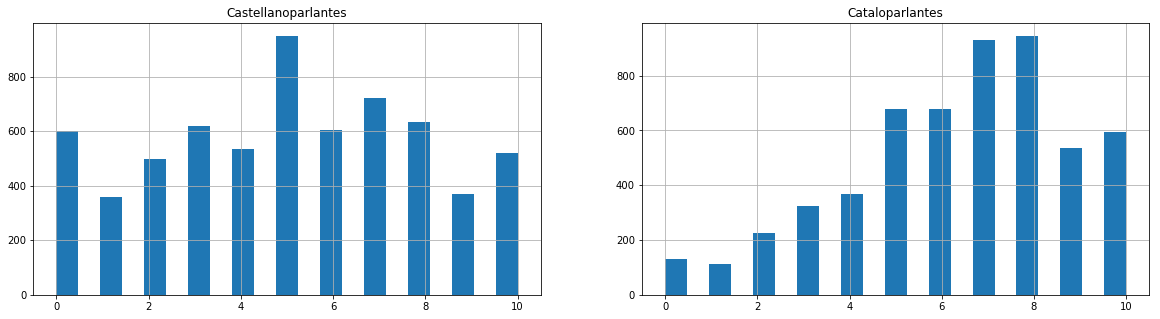

In [67]:
castellanoVsCatala('SL3_ERC', areCat)

In [25]:
df['Timestamp']

castellano    251661
catalan        19303
galego          7103
euskera         2166
english         1324
gallego            2
Name: language, dtype: int64

In [70]:
df.describe().loc[:,'RTime_27']

count    281559.000000
mean          9.795443
std          50.503274
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max       18175.000000
Name: RTime_27, dtype: float64

count    12486.000000
mean         3.672753
std          1.427205
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Ans_27, dtype: float64

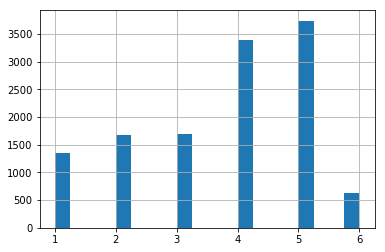

In [94]:
asd = df.loc[(df['language']=='castellano') & areCat(df),'Ans_27']
asd[asd < 20].hist(bins=20)
asd.describe()

count    8903.000000
mean        4.532068
std         0.975238
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: Ans_27, dtype: float64

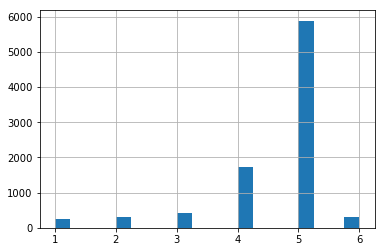

In [95]:
asd = df.loc[((df['language']=='catalan') & areCat(df)),'Ans_27']
asd[asd < 20].hist(bins=20)
asd.describe()

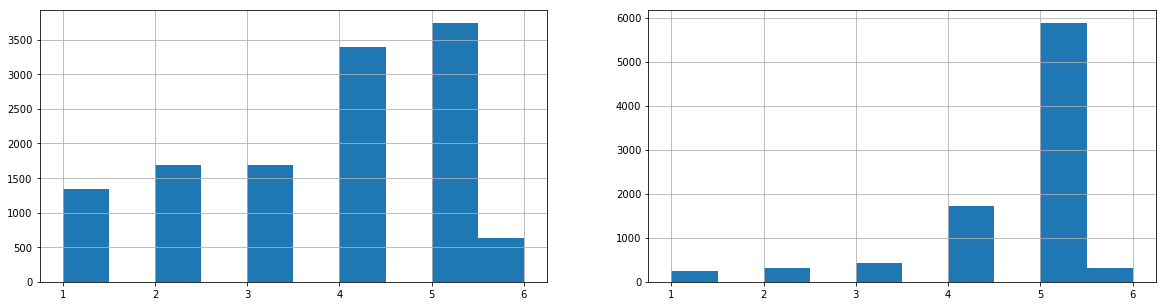

In [96]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & areCat(df),'Ans_27'].hist(ax=ax[0])
asd = df.loc[(df['language']=='catalan') & areCat(df),'Ans_27'].hist(ax=ax[1])

In [135]:
df.loc[df['language']=='catalan','National.Preferred'].value_counts()

16.0    4244
17.0    2375
8.0     2045
15.0    1671
19.0    1226
10.0    1174
6.0      745
18.0     631
2.0      388
13.0     214
14.0     176
4.0       53
7.0       49
3.0       39
1.0       38
5.0       19
11.0       8
9.0        7
12.0       5
Name: National.Preferred, dtype: int64

In [136]:
df['A'].value_counts()

123.0    38558
120.0    24108
111.0    22623
119.0    21598
122.0    12472
117.0    10398
126.0     7916
109.0     7610
115.0     6825
118.0     6543
112.0     6482
113.0     6211
114.0     5024
124.0     4849
121.0     3012
116.0     2478
125.0     2186
127.0     1235
130.0     1029
110.0      621
129.0      137
128.0      130
Name: SupQ_7, dtype: int64

In [99]:
(df['European.Prefered.Party'] == df['National.Preferred']).sum()

69405

-----------------------

ERC visto desde catalanoparlantes y españoles

In [ ]:
df.loc[df['language']=='catalan', 'SL2_ERC'].hist(bins=21)
df.loc[df['language']=='castellano', 'SL2_ERC'].hist(bins=21)

df.loc[df['language']=='catalan', 'SL3_ERC'].hist(bins=21)
df.loc[df['language']=='castellano', 'SL3_ERC'].hist(bins=21)

df.loc[df['language']=='euskera', 'SL3_PNV_CiU'].hist(bins=21)
df.loc[df['language']=='catalan', 'SL3_PNV_CiU'].hist(bins=21)
df.loc[df['language']=='castellano', 'SL3_PNV_CiU'].hist(bins=21)

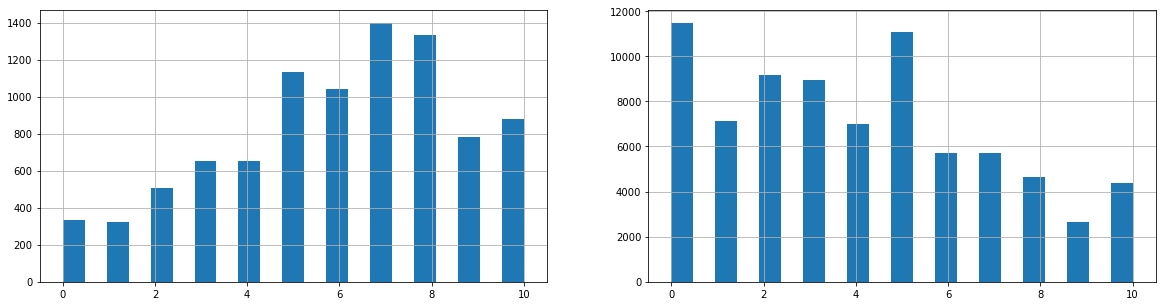

In [42]:
fig1, ax1 = plt.subplots(1,2, figsize=(20,5))
df.loc[df['language']=='', 'SL3_ERC'].hist(bins=21, ax=ax1[0])
df.loc[df['language']=='castellano', 'SL3_ERC'].hist(bins=21, ax=ax1[1])

Solo los catalanes-valencianos

In [ ]:
df.loc[(df['language']=='castellano') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_ERC'].hist(bins=21)
df.loc[(df['language']=='catalan') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_ERC'].hist(bins=21)

### Tiempo de respuesta
Más emocional = menos tiempo de deliberación

count    8903.000000
mean        9.264630
std        66.182867
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max      6106.000000
Name: RTime_27, dtype: float64

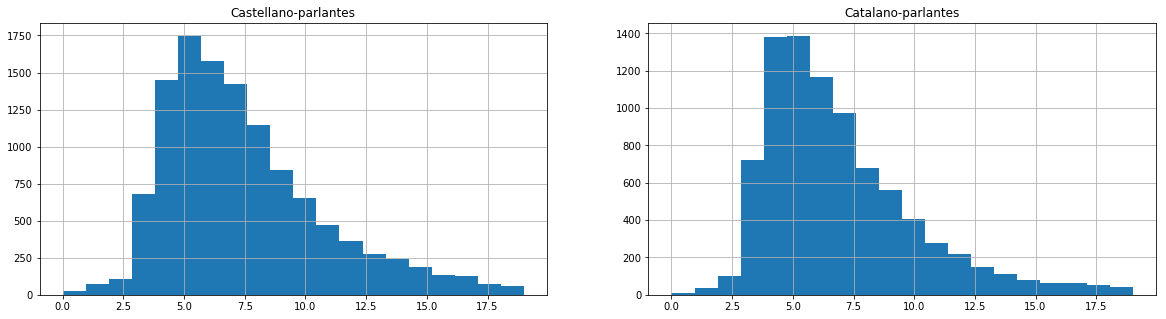

In [101]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & areCat(df),'RTime_27']
asd[asd < 20].hist(bins=20, ax=ax[0])
asd.describe()
ax[0].set(title='Castellano-parlantes')
asd = df.loc[(df['language']=='catalan') & areCat(df),'RTime_27']
asd[asd < 20].hist(bins=20, ax=ax[1])
ax[1].set(title='Catalano-parlantes')
asd.describe()

count    4804.000000
mean        6.868443
std        24.283353
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max      1543.000000
Name: RTime_29, dtype: float64

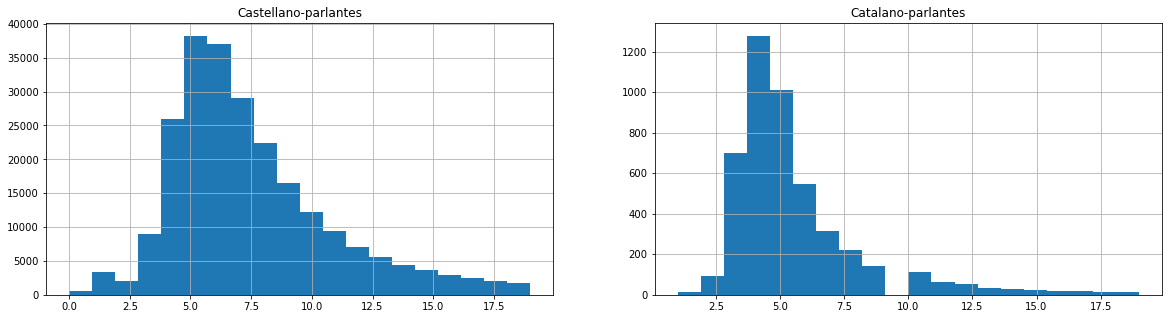

In [138]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & (df['Ans_29'] != 9) & areAll(df),'RTime_29']
asd[asd < 20].hist(bins=20, ax=ax[0])#, cumulative=True)
asd.describe()
ax[0].set(title='Castellano-parlantes')
asd1 = df.loc[(df['language']=='catalan') & (df['Ans_29'] == 1) & areCat(df),'RTime_29']
asd1[asd1 < 20].hist(bins=20, ax=ax[1])#, cumulative=True)
ax[1].set(title='Catalano-parlantes')
asd1.describe()

count    2241.000000
mean        8.133869
std        70.262092
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max      3311.000000
Name: RTime_29, dtype: float64

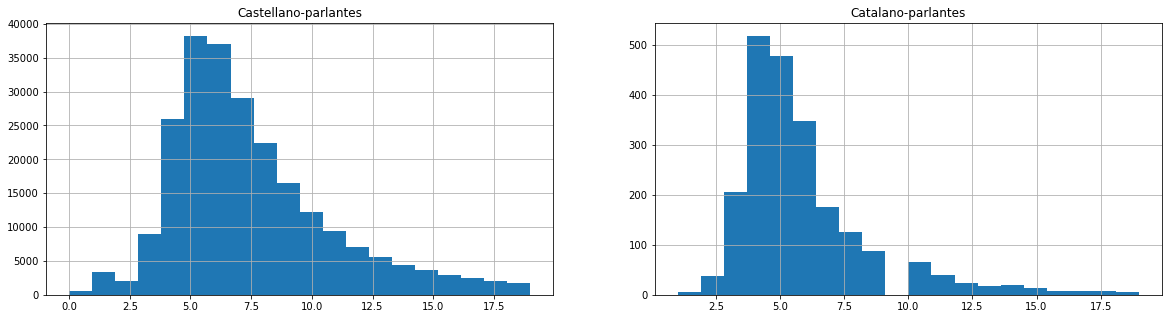

In [166]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & (df['Ans_29'] != 9) & areAll(df),'RTime_29']
asd[asd < 20].hist(bins=20, ax=ax[0])#, cumulative=True)
asd.describe()
ax[0].set(title='Castellano-parlantes')
asd1 = df.loc[(df['language']=='galego') & (df['Ans_29'] == 1) & areGal(df),'RTime_29']
asd1[asd1 < 20].hist(bins=20, ax=ax[1])#, cumulative=True)
ax[1].set(title='Catalano-parlantes')
asd1.describe()

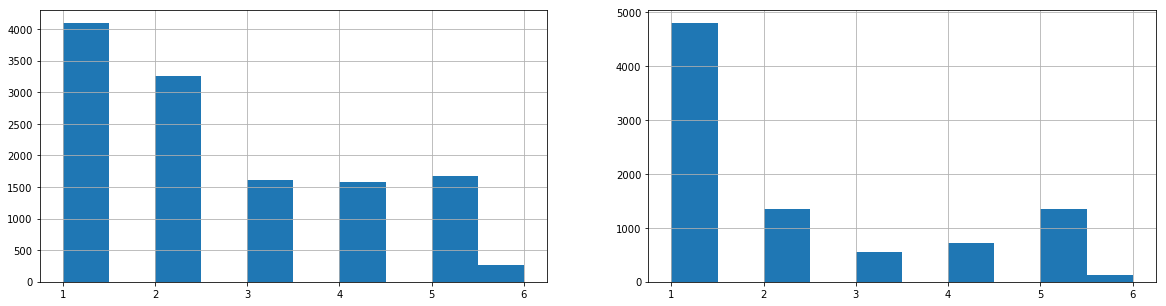

In [141]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & areCat(df),'Ans_29'].hist(ax=ax[0])
asd = df.loc[(df['language']=='catalan') & areCat(df),'Ans_29'].hist(ax=ax[1])

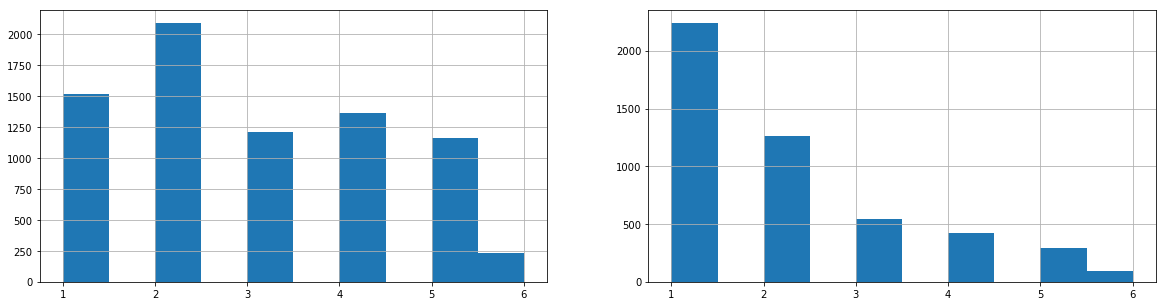

In [143]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & areGal(df),'Ans_29'].hist(ax=ax[0])
asd = df.loc[(df['language']=='galego') & areGal(df),'Ans_29'].hist(ax=ax[1])

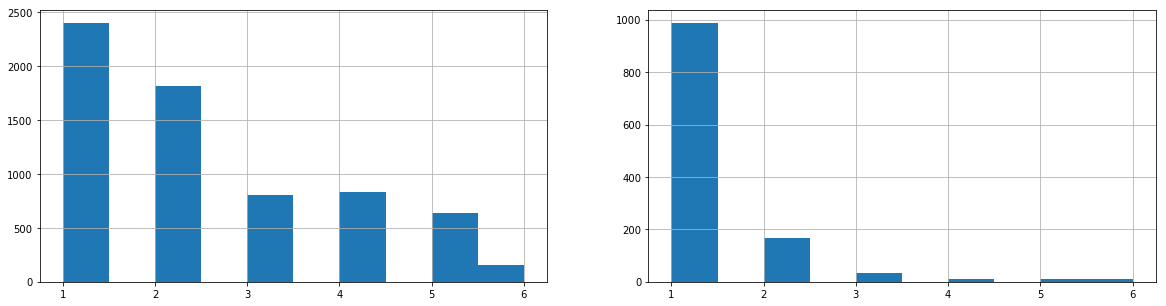

In [145]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[(df['language']=='castellano') & areVasc(df),'Ans_29'].hist(ax=ax[0])
asd = df.loc[(df['language']=='euskera') & areVasc(df),'Ans_29'].hist(ax=ax[1])

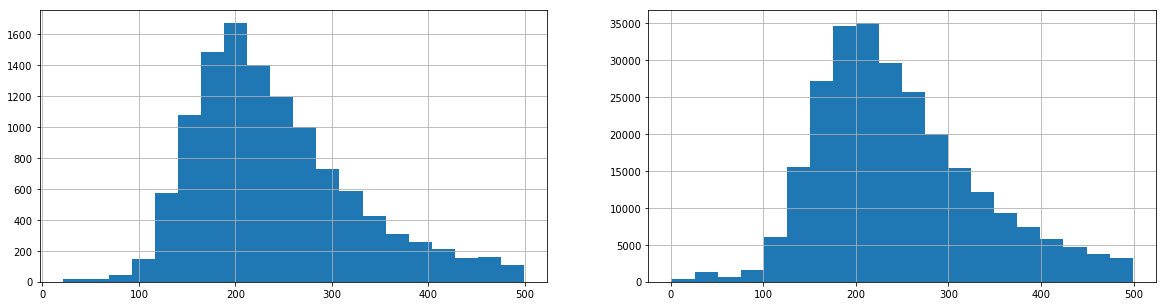

In [165]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
asd = df.loc[areGal(df),'Total.Time']
asd[asd < 500].hist(bins=20, ax=ax[0])#, cumulative=True)
asd1 = df.loc[areAll(df),'Total.Time']
asd1[asd1 < 500].hist(bins=20, ax=ax[1])#, cumulative=True)